In [72]:
import pandas as pd

In [10]:
#Load the dataset
df = pd.read_csv("data/diabetes.csv")

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
#check for missing values
print("Missing values:")
df.isnull().sum()

Missing values:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
# Check for zero values in columns where zero is invalid
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\n Zero values in key columns:")

(df[cols_with_invalid_zeros] == 0).sum()


 Zero values in key columns:


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [32]:
# Summary statistics
print("\n Summary Statistics:")

df.describe()


 Summary Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [70]:
import numpy as np

In [40]:
# replace zeros in the 5 columns with their 

for col in cols_with_invalid_zeros:
    median = df[df[col] != 0][col].median()
    df[col] = df[col].replace(0, median)

In [52]:
# check if the zero values are gone:

(df[cols_with_invalid_zeros] == 0).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [44]:
# Exploratory Data Analysis

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style = "whitegrid")

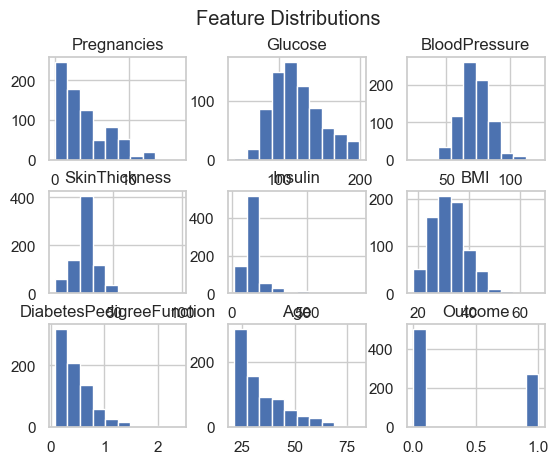

In [92]:
# Histograms for all features
df.hist()
plt.suptitle("Feature Distributions")
plt.show()

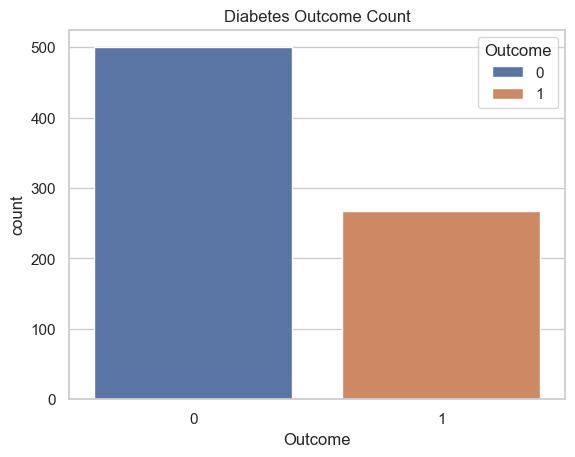

In [106]:
# Class/outcome distribution
sns.countplot(x = 'Outcome', data = df, hue = 'Outcome')
plt.title('Diabetes Outcome Count')
plt.show()

In [114]:
# Print class percentages

outcome_counts = df['Outcome'].value_counts(normalize=True) * 100
outcome_counts

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

In [116]:
# or

df.groupby('Outcome').size() / len(df) *100

Outcome
0    65.104167
1    34.895833
dtype: float64

In [118]:
# Correlation

In [124]:
corr_matrix = df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


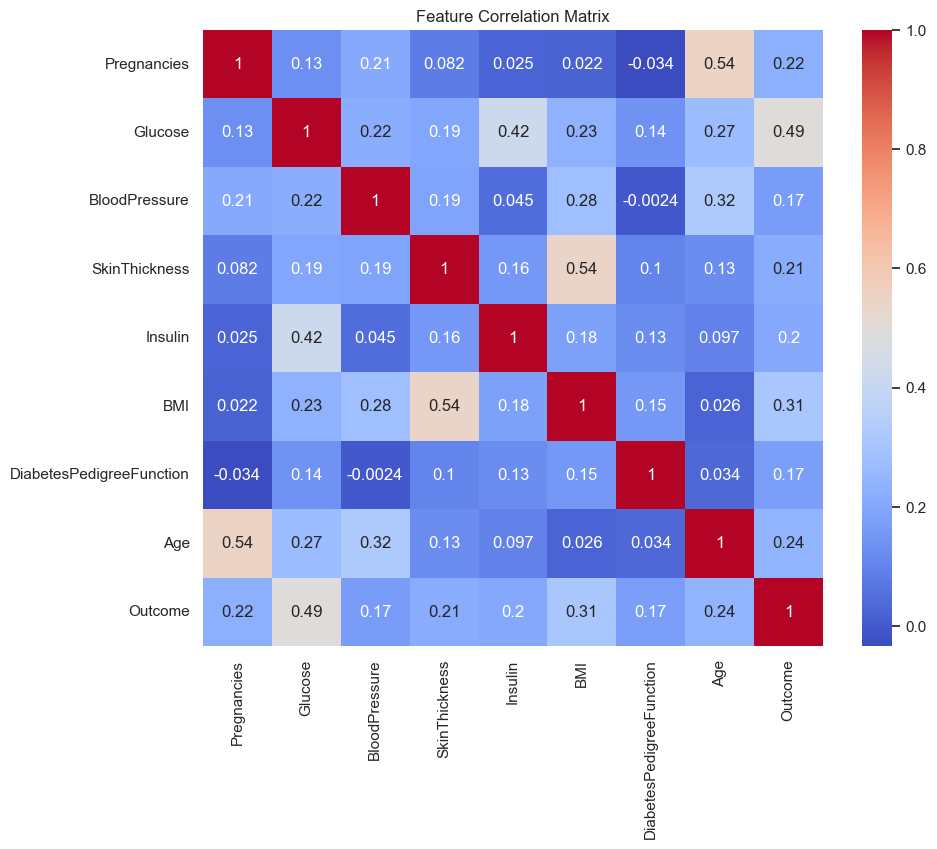

In [134]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.tight_layout
plt.show()

In [ ]:
# Prepare Data for Modeling

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [144]:
# 1. Separate features and target
X = df.drop('Outcome', axis =1)
y = df['Outcome']

# 2. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# 3. Initialize scaler or create an instance of the scaler
scaler = StandardScaler()

#4. Fit scaler on training data
scaler.fit(X_train)

#5. Transform training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [146]:
# train a model - logistic regression for binary classification

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [162]:
#initialize the model
model = LogisticRegression(random_state=42)

#train the model
model.fit(X_train_scaled, y_train)

#predict on test set
y_pred = model.predict(X_test_scaled)

In [158]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7077922077922078

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


Confusion Matrix:
 [[82 18]
 [27 27]]


In [160]:
#The model is better at predicting non-diabetics (class 0)
#It struggles to detect diabetics (class 1), critical in healthcare
#Accuracy is ok, but recall for diabetics must improve

In [172]:
# Train a random forest model for better results

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# initialize the model
rf_model = RandomForestClassifier(random_state=42)

# train the model
rf_model.fit(X_train_scaled, y_train)

# make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

In [174]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.7792207792207793

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154


Confusion Matrix:
 [[87 13]
 [21 33]]


In [176]:
# attempt to predict a new patients status with new data

patient_data = np.array([[2, 130, 80, 25, 100, 28.0, 0.5, 35]])

In [178]:
# scale the data

patient_data_scaled = scaler.transform(patient_data)

# predict with random forest model
prediction = rf_model.predict(patient_data_scaled)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [180]:
prediction

array([0])

In [184]:
print("Predicted Outcome:", prediction)

Predicted Outcome: [0]
